In [145]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [146]:
df=pd.read_csv("titanic_toy.csv")
df.sample(5)

,Age,Fare,Family,Survived
876,20.0,9.8458,0,0
320,22.0,7.2500,0,0
864,24.0,13.0000,0,0
611,NaN,7.0500,0,0
680,NaN,8.1375,0,0


In [147]:
#Checking how much percentage of data is missing from each column
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [148]:
X= df.drop(columns=["Survived"])
Y=df[["Survived"]]

# Filling with Mean and Median without Sklearn

In [149]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

X_train.shape, X_test.shape

((712, 3), (179, 3))

In [150]:
#Calculating Mean and Median for Age and Fare

age_mean= df["Age"].mean()
age_median= df["Age"].median()

fare_mean= df["Fare"].mean()
fare_median= df["Fare"].median()

In [151]:
#Creating 4 new columns and inserting filled values

X_train["Mean_Age"]=X_train["Age"].fillna(age_mean)
X_train["Median_Age"]=X_train["Age"].fillna(age_median)

X_train["Mean_Fare"]=X_train["Fare"].fillna(fare_mean)
X_train["Median_Fare"]=X_train["Fare"].fillna(fare_median)

In [152]:
#Comparison in varience 

print("Age Original Variance ",X_train["Age"].var())
print("Age Mean Variance ",X_train["Mean_Age"].var())
print("Age Meian Variance ",X_train["Median_Age"].var())

print("Fare Original Variance ",X_train["Fare"].var())
print("Fare Mean Variance ",X_train["Mean_Fare"].var())
print("Fare Meian Variance ",X_train["Median_Fare"].var())

Age Original Variance  204.3495133904614
Age Mean Variance  161.813866455868
Age Meian Variance  162.33852985330878
Fare Original Variance  2448.197913706318
Fare Mean Variance  2324.2440261087
Fare Meian Variance  2340.098181126126


# Distribution Changes in Fare and Age

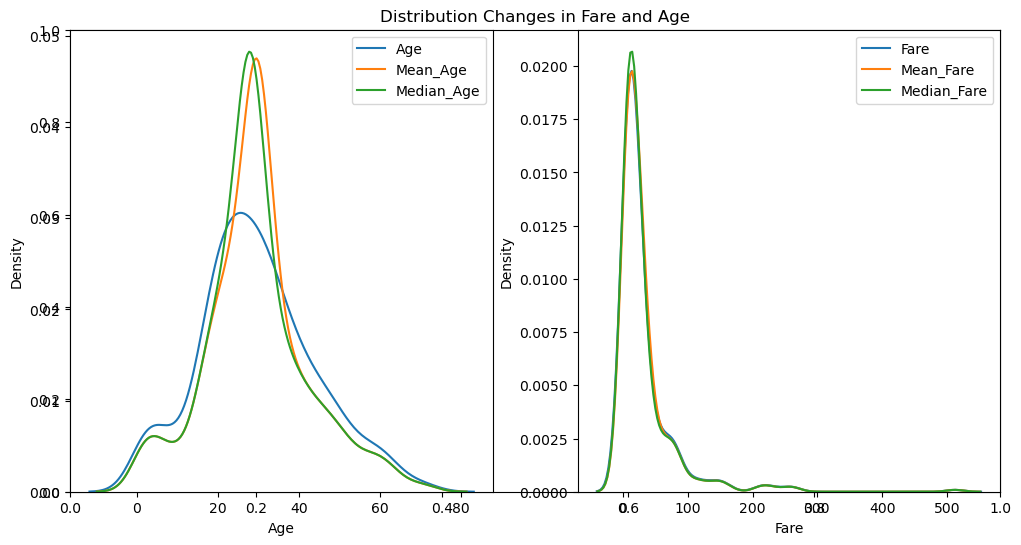

In [153]:
plt.figure(figsize=(12,6))
plt.title("Distribution Changes in Fare and Age")

plt.subplot(121)
sns.kdeplot(x=X_train["Age"], label="Age")
sns.kdeplot(x=X_train["Mean_Age"], label="Mean_Age")
sns.kdeplot(x=X_train["Median_Age"], label="Median_Age")
plt.legend() 

plt.subplot(122)
sns.kdeplot(x=X_train["Fare"], label="Fare")
sns.kdeplot(x=X_train["Mean_Fare"], label="Mean_Fare")
sns.kdeplot(x=X_train["Median_Fare"], label="Median_Fare")

plt.legend() 
plt.show()

# Outliers Detection in Age and Fare

<Axes: >

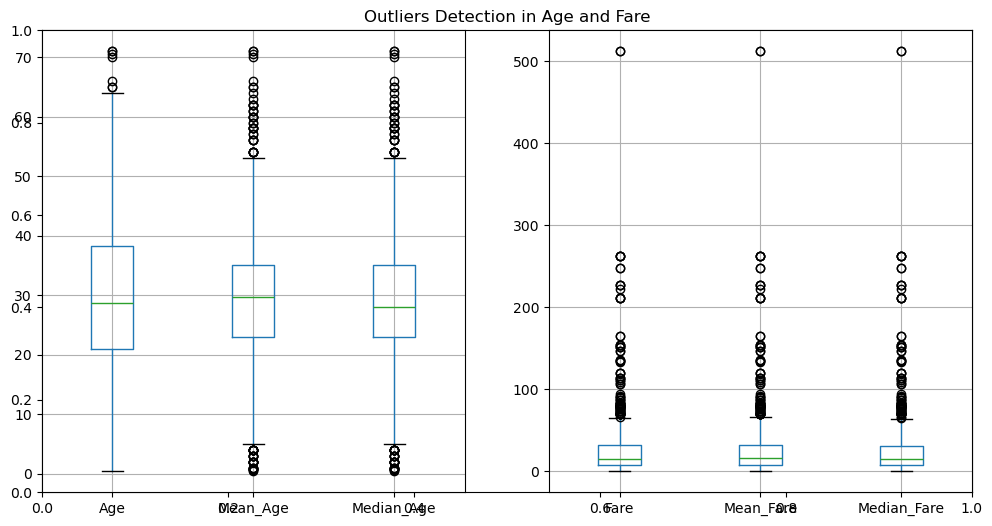

In [154]:
plt.figure(figsize=(12,6))
plt.title("Outliers Detection in Age and Fare")
plt.subplot(1,2,1)
X_train[["Age","Mean_Age","Median_Age"]].boxplot()

plt.subplot(1,2,2)
X_train[["Fare","Mean_Fare","Median_Fare"]].boxplot()

In [155]:
#Checking relation between columns

X_train.cov()

,Age,Fare,Family,Mean_Age,Median_Age,Mean_Fare,Median_Fare
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.631558,64.858451
Fare,70.719262,2448.197914,17.258917,55.800924,59.661820,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.143296,-5.088278,16.386748,16.476326
Mean_Age,204.349513,55.800924,-5.143296,161.813866,161.838181,52.948856,51.541608
Median_Age,204.349513,59.661820,-5.088278,161.838181,162.338530,56.613065,55.142638
Mean_Fare,66.631558,2448.197914,16.386748,52.948856,56.613065,2324.244026,2324.533881
Median_Fare,64.858451,2448.197914,16.476326,51.541608,55.142638,2324.533881,2340.098181


# Filling Missing Values Using Sklearn

In [181]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [182]:
imputer1= SimpleImputer(strategy='mean')
imputer2= SimpleImputer(strategy='median')

In [183]:
trf=ColumnTransformer(
    [
        ('age_impute',imputer1,["Age"]),
        ('fare_impute', imputer2, ["Fare"])
    ],remainder="passthrough"
)

In [184]:
X_train_trans=trf.fit_transform(X_train)
X_test_trans= trf.transform(X_test)

In [185]:
new_df = pd.DataFrame(X_train_trans, columns=X_train.columns, index=X_train.index)

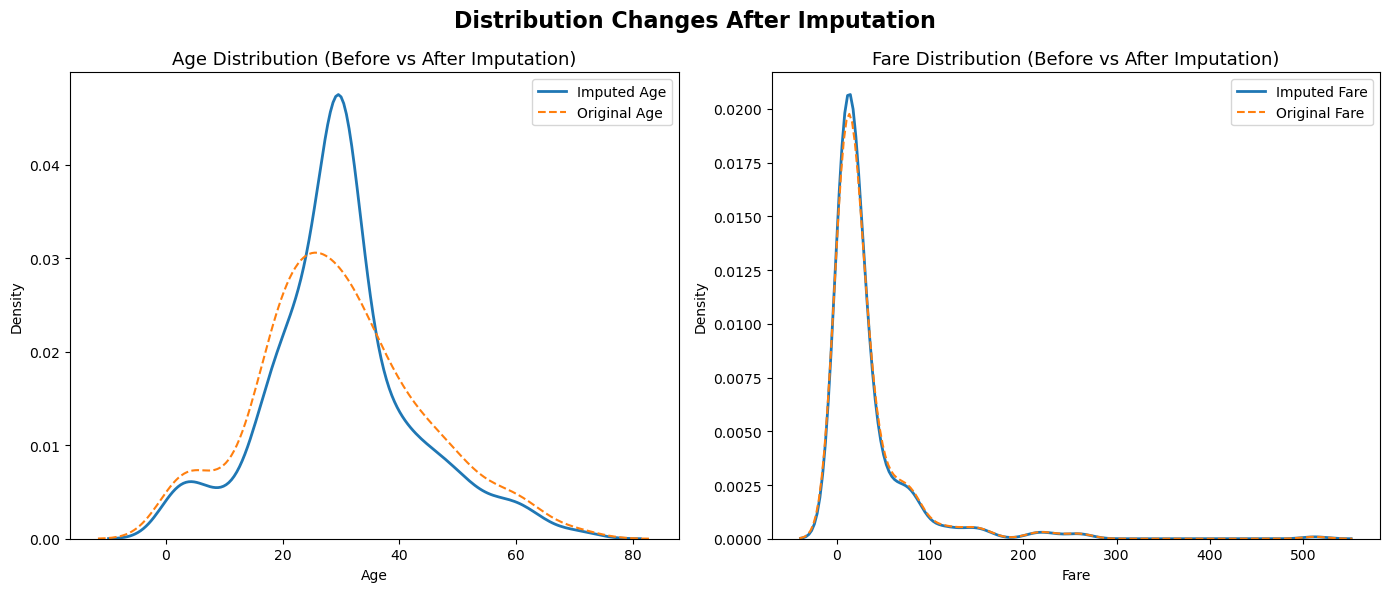

In [187]:
plt.figure(figsize=(14,6))  

# --- Age Distribution ---
plt.subplot(1, 2, 1)
sns.kdeplot(x=new_df["Age"], label="Imputed Age", linewidth=2)
sns.kdeplot(x=X_train["Age"], label="Original Age", linestyle="--")
plt.title("Age Distribution (Before vs After Imputation)", fontsize=13)
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()

# --- Fare Distribution ---
plt.subplot(1, 2, 2)
sns.kdeplot(x=new_df["Fare"], label="Imputed Fare", linewidth=2)
sns.kdeplot(x=X_train["Fare"], label="Original Fare", linestyle="--")
plt.title("Fare Distribution (Before vs After Imputation)", fontsize=13)
plt.xlabel("Fare")
plt.ylabel("Density")
plt.legend()

plt.suptitle("Distribution Changes After Imputation", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()


# Filling with Orbitory Values Using Sklearn

In [162]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [176]:
imputer1= SimpleImputer(strategy='constant',fill_value=100)
imputer2= SimpleImputer(strategy='constant',fill_value=-50)

In [177]:
trf=ColumnTransformer(
    [
        ('age_impute',imputer1,["Age"]),
        ('fare_impute', imputer2, ["Fare"])
    ],remainder="passthrough"
)

In [180]:
X_train_trans=trf.fit_transform(X_train)
X_test_trans= trf.transform(X_test)

new_df = pd.DataFrame(X_train_trans, columns=X_train.columns, index=X_train.index)


# Distribution Changes in Fare and Age (Orbitory Values)

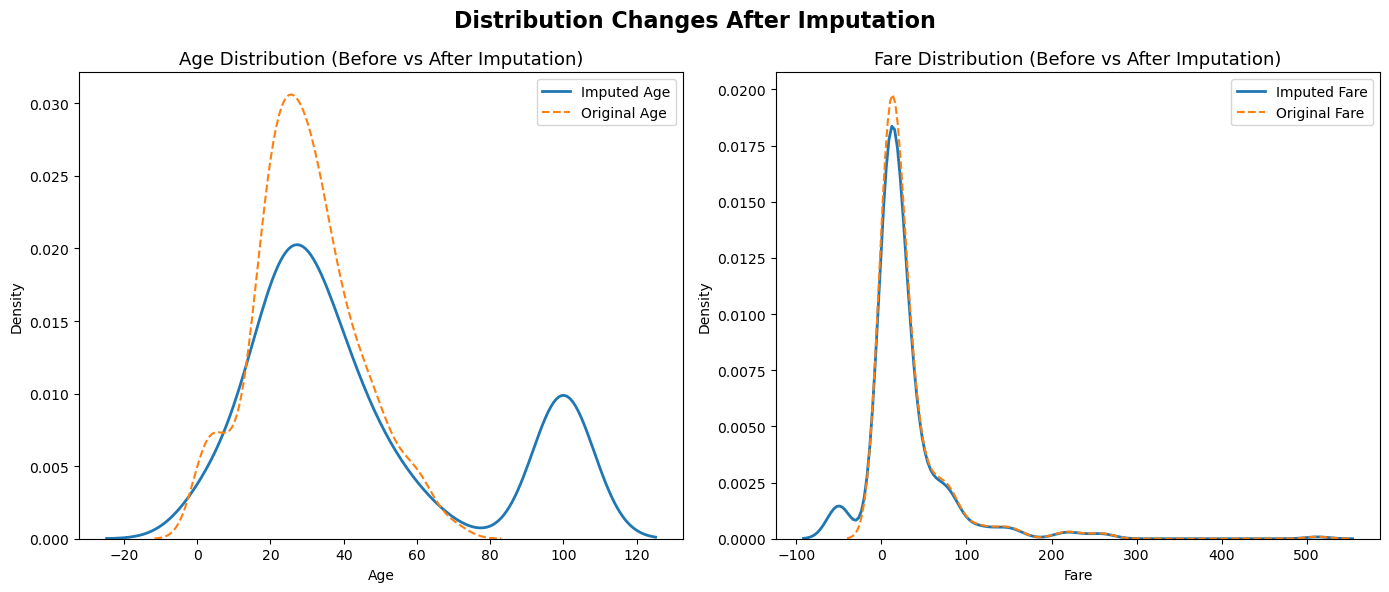

In [179]:
plt.figure(figsize=(14,6))  

# --- Age Distribution ---
plt.subplot(1, 2, 1)
sns.kdeplot(x=new_df["Age"], label="Imputed Age", linewidth=2)
sns.kdeplot(x=X_train["Age"], label="Original Age", linestyle="--")
plt.title("Age Distribution (Before vs After Imputation)", fontsize=13)
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()

# --- Fare Distribution ---
plt.subplot(1, 2, 2)
sns.kdeplot(x=new_df["Fare"], label="Imputed Fare", linewidth=2)
sns.kdeplot(x=X_train["Fare"], label="Original Fare", linestyle="--")
plt.title("Fare Distribution (Before vs After Imputation)", fontsize=13)
plt.xlabel("Fare")
plt.ylabel("Density")
plt.legend()

plt.suptitle("Distribution Changes After Imputation", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()
